In [2]:
from IPython.display import Image, display
import numpy as np
from os.path import join
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [3]:
df_link = pd.read_csv('../input/dataset/datasets.csv')
df_link.head()

Dataset                Camera  Category  \
0    AvignonHotelDesMonnaies  Canon EOS 5D Mark II  Building   
1     BoutevilleWindowDetail  Canon EOS 5D Mark II  Building   
2  BurgosPuertaDeLaCoroneria  Canon EOS 5D Mark II  Building   
3       CognacGardenBuilding  Canon EOS 5D Mark II  Building   
4        CognacStJacquesDoor  Canon EOS 5D Mark II  Building   

                   Author Organisation/Project  \
0  Romuald Perrot rperrot                  NaN   
1  Romuald Perrot rperrot                  NaN   
2  Romuald Perrot rperrot                  NaN   
3  Romuald Perrot rperrot                  NaN   
4  Romuald Perrot rperrot                  NaN   

                                             Source  \
0  https://github.com/rperrot/ReconstructionDataSet   
1  https://github.com/rperrot/ReconstructionDataSet   
2  https://github.com/rperrot/ReconstructionDataSet   
3  https://github.com/rperrot/ReconstructionDataSet   
4  https://github.com/rperrot/ReconstructionDataSet   

                                        Dataset link  Images  \
0  https://github.com/rperrot/ReconstructionDataS...    11.0   
1  https://github.com/rperrot/ReconstructionDataS...    26.0   
2  https://github.com/rperrot/ReconstructionDataS...    10.0   
3  https://github.com/rperrot/ReconstructionDataS...    12.0   
4  https://github.com/rperrot/ReconstructionDataS...    19.0   

  Size in GB (est.) Ground Truth                                 License  \
0             0,176           no  Attribution-NonCommercial 3.0 Unported   
1             0,416           no  Attribution-NonCommercial 3.0 Unported   
2              0,16           no  Attribution-NonCommercial 3.0 Unported   
3             0,192           no  Attribution-NonCommercial 3.0 Unported   
4             0,304           no  Attribution-NonCommercial 3.0 Unported   

                                        License link  \
0  https://github.com/rperrot/ReconstructionDataS...   
1  https://github.com/rperrot/ReconstructionDataS...   
2  https://github.com/rperrot/ReconstructionDataS...   
3  https://github.com/rperrot/ReconstructionDataS...   
4  https://github.com/rperrot/ReconstructionDataS...   

                                         SampleImage Image Format  DOI Masks  \
0  https://github.com/rperrot/ReconstructionDataS...          JPG  NaN   NaN   
1  https://github.com/rperrot/ReconstructionDataS...          JPG  NaN   NaN   
2  https://github.com/rperrot/ReconstructionDataS...          JPG  NaN   NaN   
3  https://github.com/rperrot/ReconstructionDataS...          JPG  NaN   NaN   
4  https://github.com/rperrot/ReconstructionDataS...          JPG  NaN   NaN   

                                         Description  
0  Hotel des Monnaies facade building in Avignon ...  
1  Upper window detail of Bouteville Castle (France)  
2          North Transept Portal of Burgos Cathedral  
3                   Cognac Garden Building image set  
4                  Saint Jacques Door at cognac City

In [4]:
df = df_link.copy()
df = df.dropna(axis=0, subset=['Source'])
df.head()

Dataset                Camera  Category  \
0    AvignonHotelDesMonnaies  Canon EOS 5D Mark II  Building   
1     BoutevilleWindowDetail  Canon EOS 5D Mark II  Building   
2  BurgosPuertaDeLaCoroneria  Canon EOS 5D Mark II  Building   
3       CognacGardenBuilding  Canon EOS 5D Mark II  Building   
4        CognacStJacquesDoor  Canon EOS 5D Mark II  Building   

                   Author Organisation/Project  \
0  Romuald Perrot rperrot                  NaN   
1  Romuald Perrot rperrot                  NaN   
2  Romuald Perrot rperrot                  NaN   
3  Romuald Perrot rperrot                  NaN   
4  Romuald Perrot rperrot                  NaN   

                                             Source  \
0  https://github.com/rperrot/ReconstructionDataSet   
1  https://github.com/rperrot/ReconstructionDataSet   
2  https://github.com/rperrot/ReconstructionDataSet   
3  https://github.com/rperrot/ReconstructionDataSet   
4  https://github.com/rperrot/ReconstructionDataSet   

                                        Dataset link  Images  \
0  https://github.com/rperrot/ReconstructionDataS...    11.0   
1  https://github.com/rperrot/ReconstructionDataS...    26.0   
2  https://github.com/rperrot/ReconstructionDataS...    10.0   
3  https://github.com/rperrot/ReconstructionDataS...    12.0   
4  https://github.com/rperrot/ReconstructionDataS...    19.0   

  Size in GB (est.) Ground Truth                                 License  \
0             0,176           no  Attribution-NonCommercial 3.0 Unported   
1             0,416           no  Attribution-NonCommercial 3.0 Unported   
2              0,16           no  Attribution-NonCommercial 3.0 Unported   
3             0,192           no  Attribution-NonCommercial 3.0 Unported   
4             0,304           no  Attribution-NonCommercial 3.0 Unported   

                                        License link  \
0  https://github.com/rperrot/ReconstructionDataS...   
1  https://github.com/rperrot/ReconstructionDataS...   
2  https://github.com/rperrot/ReconstructionDataS...   
3  https://github.com/rperrot/ReconstructionDataS...   
4  https://github.com/rperrot/ReconstructionDataS...   

                                         SampleImage Image Format  DOI Masks  \
0  https://github.com/rperrot/ReconstructionDataS...          JPG  NaN   NaN   
1  https://github.com/rperrot/ReconstructionDataS...          JPG  NaN   NaN   
2  https://github.com/rperrot/ReconstructionDataS...          JPG  NaN   NaN   
3  https://github.com/rperrot/ReconstructionDataS...          JPG  NaN   NaN   
4  https://github.com/rperrot/ReconstructionDataS...          JPG  NaN   NaN   

                                         Description  
0  Hotel des Monnaies facade building in Avignon ...  
1  Upper window detail of Bouteville Castle (France)  
2          North Transept Portal of Burgos Cathedral  
3                   Cognac Garden Building image set  
4                  Saint Jacques Door at cognac City

In [5]:
import requests
from io import BytesIO
from PIL import Image

for i in range(100):
  r = requests.get(df['Source'][i])
  print("Status:", r.status_code)
  print(r.url)

Status: 200
https://github.com/rperrot/ReconstructionDataSet
Status: 200
https://github.com/rperrot/ReconstructionDataSet
Status: 200
https://github.com/rperrot/ReconstructionDataSet
Status: 200
https://github.com/rperrot/ReconstructionDataSet
Status: 200
https://github.com/rperrot/ReconstructionDataSet
Status: 200
https://github.com/rperrot/ReconstructionDataSet
Status: 200
https://github.com/rperrot/ReconstructionDataSet
Status: 200
https://github.com/rperrot/ReconstructionDataSet
Status: 200
https://github.com/rperrot/ReconstructionDataSet
Status: 200
https://github.com/natowi/dataset_flowerpot
Status: 200
https://github.com/alicevision/dataset_monstree
Status: 200
https://github.com/alicevision/dataset_monstree
Status: 200
https://github.com/alicevision/dataset_monstree
Status: 200
https://github.com/alicevision/dataset_buddha
Status: 200
https://github.com/alicevision/dataset_buddha
Status: 200
https://peterfalkingham.com/resources/
Status: 200
https://peterfalkingham.com/resource

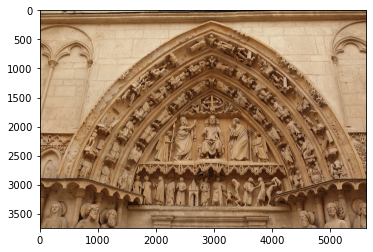

In [6]:
from skimage import io

image = io.imread('../input/data-image/BurgosPuertaDeLaCoroneria/DPP_0245.JPG')
plt.imshow(image)

In [7]:
list = os.listdir('../input/data-image/BurgosPuertaDeLaCoroneria')
for i in range(len(list)):
  print(list[i])

DPP_0251.JPG
DPP_0249.JPG
DPP_0247.JPG
DPP_0248.JPG
DPP_0253.JPG
DPP_0254.JPG
DPP_0250.JPG
DPP_0245.JPG
DPP_0246.JPG
DPP_0252.JPG


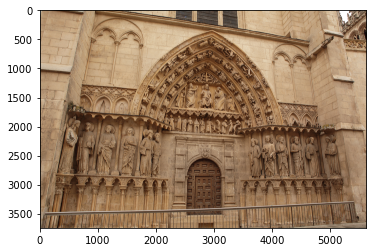

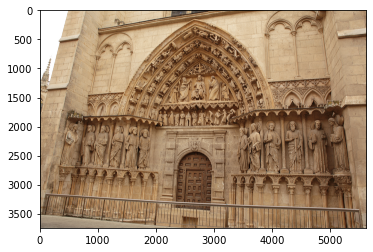

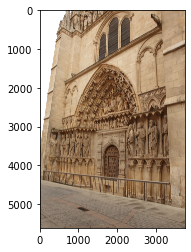

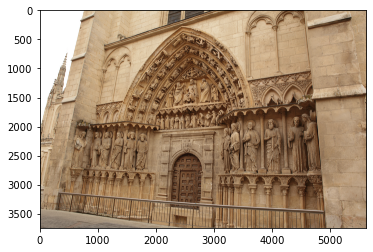

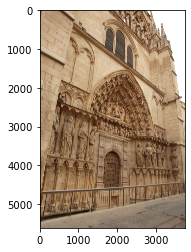

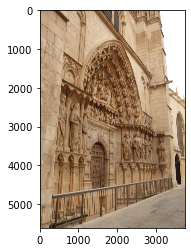

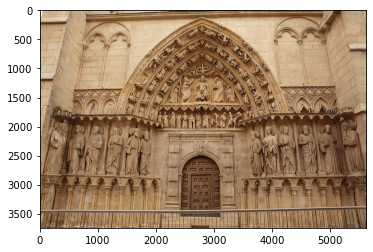

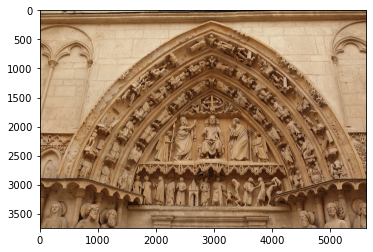

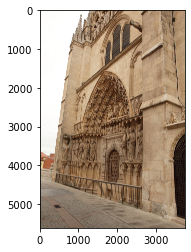

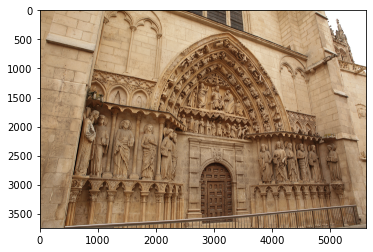

In [8]:
import matplotlib.image as mpimg

def process(filename):
    image = mpimg.imread('../input/data-image/BurgosPuertaDeLaCoroneria/'+filename)
    plt.figure()
    plt.imshow(image)

for file in list:
    process(file)

## Image Resizing and Scaling

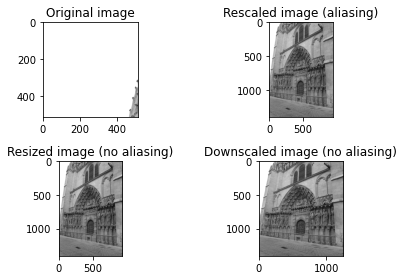

In [9]:
import matplotlib.pyplot as plt
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

img = cv2.imread('../input/data-image/BurgosPuertaDeLaCoroneria/DPP_0247.JPG')
image = color.rgb2gray(img)

image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

## Image Stitching



In [10]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25850 sha256=3ed0761c738032cf284bb5fe87e58beb677b9a31e1c2388c69a12d3e011c57bd
  Stored in directory: /root/.cache/pip/wheels/fc/9c/6d/1826267c72afa51b564c9c6e0f66abc806879338bc593a2270
Successfully built imutils


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import imutils
cv2.ocl.setUseOpenCL(False)

In [12]:
# select the image id (valid values 1,2,3, or 4)
feature_extractor = 'orb' # one of 'sift', 'surf', 'brisk', 'orb'
feature_matching = 'bf'

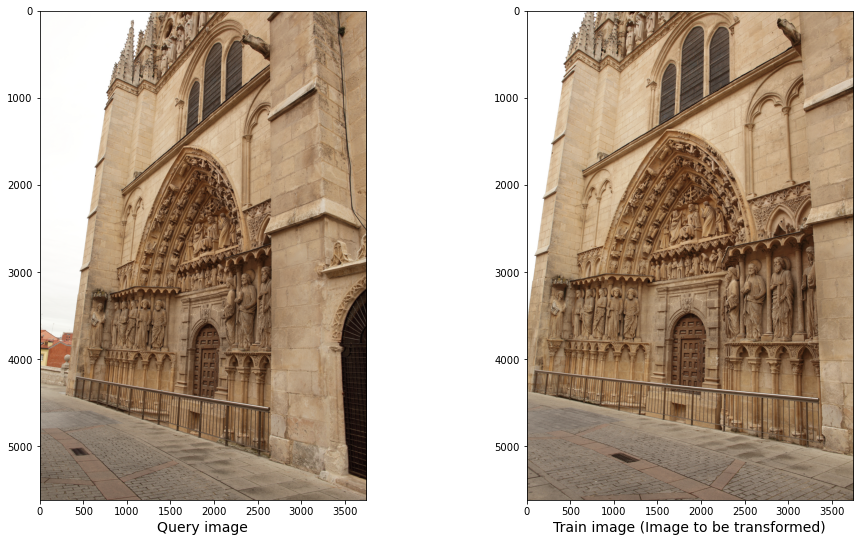

In [13]:
# read images and transform them to grayscale
# Make sure that the train image is the image that will be transformed
trainImg = imageio.imread('../input/data-image/BurgosPuertaDeLaCoroneria/DPP_0247.JPG')
trainImg_gray = cv2.cvtColor(trainImg, cv2.COLOR_RGB2GRAY)

queryImg = imageio.imread('../input/data-image/BurgosPuertaDeLaCoroneria/DPP_0246.JPG')
# Opencv defines the color channel in the order BGR. 
# Transform it to RGB to be compatible to matplotlib
queryImg_gray = cv2.cvtColor(queryImg, cv2.COLOR_RGB2GRAY)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(queryImg, cmap="gray")
ax1.set_xlabel("Query image", fontsize=14)

ax2.imshow(trainImg, cmap="gray")
ax2.set_xlabel("Train image (Image to be transformed)", fontsize=14)

plt.show()

In [14]:
def detectAndDescribe(image, method=None):
    """
    Compute key points and feature descriptors using an specific method
    """
    
    assert method is not None, "You need to define a feature detection method. Values are: 'sift', 'surf'"
    
    # detect and extract features from the image
    if method == 'sift':
        descriptor = cv2.xfeatures2d.SIFT_create()
    elif method == 'surf':
        descriptor = cv2.xfeatures2d.SURF_create()
    elif method == 'brisk':
        descriptor = cv2.BRISK_create()
    elif method == 'orb':
        descriptor = cv2.ORB_create()
        
    # get keypoints and descriptors
    (kps, features) = descriptor.detectAndCompute(image, None)
    
    return (kps, features)

In [15]:
kpsA, featuresA = detectAndDescribe(trainImg_gray, method=feature_extractor)
kpsB, featuresB = detectAndDescribe(queryImg_gray, method=feature_extractor)

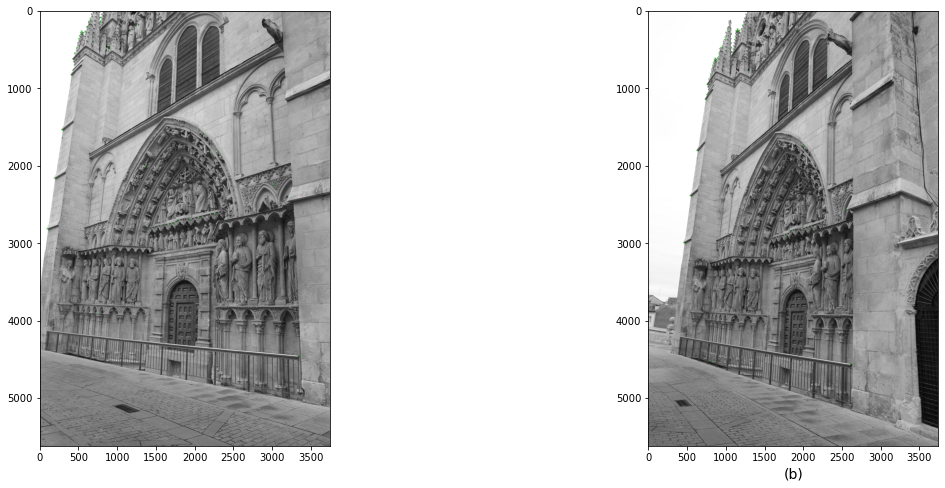

In [16]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(trainImg_gray,kpsA,None,color=(0,255,0)))
ax1.set_xlabel("", fontsize=14)
ax2.imshow(cv2.drawKeypoints(queryImg_gray,kpsB,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

plt.show()

In [17]:
def createMatcher(method,crossCheck):
    "Create and return a Matcher Object"
    
    if method == 'sift' or method == 'surf':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=crossCheck)
    elif method == 'orb' or method == 'brisk':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=crossCheck)
    return bf

In [18]:
def matchKeyPointsBF(featuresA, featuresB, method):
    bf = createMatcher(method, crossCheck=True)
        
    # Match descriptors.
    best_matches = bf.match(featuresA,featuresB)
    
    # Sort the features in order of distance.
    # The points with small distance (more similarity) are ordered first in the vector
    rawMatches = sorted(best_matches, key = lambda x:x.distance)
    print("Raw matches (Brute force):", len(rawMatches))
    return rawMatches

In [19]:
def matchKeyPointsKNN(featuresA, featuresB, ratio, method):
    bf = createMatcher(method, crossCheck=False)
    # compute the raw matches and initialize the list of actual matches
    rawMatches = bf.knnMatch(featuresA, featuresB, 2)
    print("Raw matches (knn):", len(rawMatches))
    matches = []

    # loop over the raw matches
    for m,n in rawMatches:
        # ensure the distance is within a certain ratio of each
        # other (i.e. Lowe's ratio test)
        if m.distance < n.distance * ratio:
            matches.append(m)
    return matches

Using: bf feature matcher
Raw matches (Brute force): 143


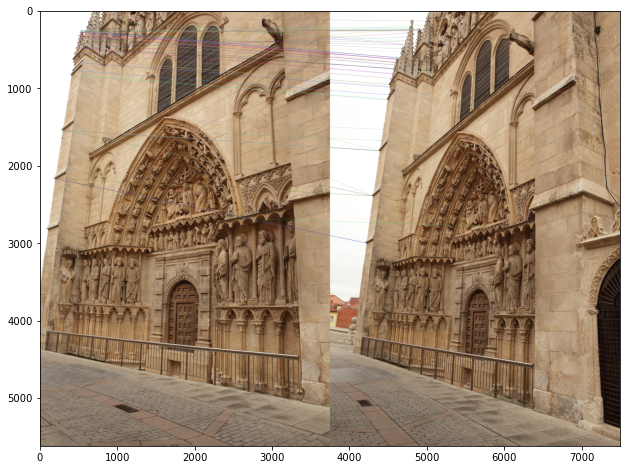

In [20]:
print("Using: {} feature matcher".format(feature_matching))

fig = plt.figure(figsize=(20,8))

if feature_matching == 'bf':
    matches = matchKeyPointsBF(featuresA, featuresB, method=feature_extractor)
    img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,matches[:100],
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
elif feature_matching == 'knn':
    matches = matchKeyPointsKNN(featuresA, featuresB, ratio=0.75, method=feature_extractor)
    img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,np.random.choice(matches,100),
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    

plt.imshow(img3)
plt.show()

In [21]:
def getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh):
    # convert the keypoints to numpy arrays
    kpsA = np.float32([kp.pt for kp in kpsA])
    kpsB = np.float32([kp.pt for kp in kpsB])
    
    if len(matches) > 4:

        # construct the two sets of points
        ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
        ptsB = np.float32([kpsB[m.trainIdx] for m in matches])
        
        # estimate the homography between the sets of points
        (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,
            reprojThresh)

        return (matches, H, status)
    else:
        return None

In [22]:
M = getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh=4)
if M is None:
    print("Error!")
(matches, H, status) = M
print(H)

[[9.24010301e-01 3.55903808e-03 3.91924454e+02]
 [1.72984361e-01 1.01945671e+00 2.69571494e+02]
 [4.11106229e-05 2.01038328e-05 1.00000000e+00]]


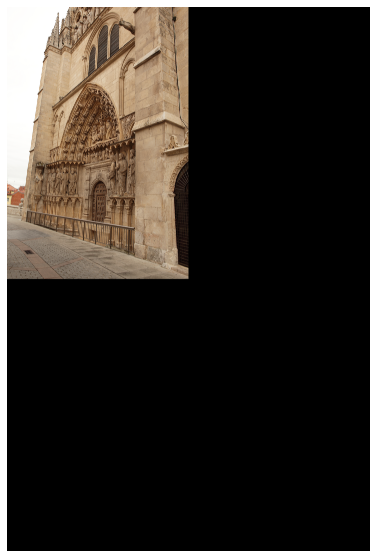

In [23]:
# Apply panorama correction
width = trainImg.shape[1] + queryImg.shape[1]
height = trainImg.shape[0] + queryImg.shape[0]

result = cv2.warpPerspective(trainImg, H, (width, height))
result[0:queryImg.shape[0], 0:queryImg.shape[1]] = queryImg

plt.figure(figsize=(20,10))
plt.imshow(result)

plt.axis('off')
plt.show()

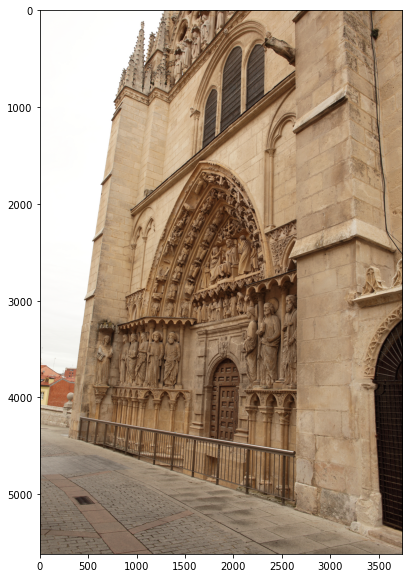

In [24]:
# transform the panorama image to grayscale and threshold it 
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

# Finds contours from the binary image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# get the maximum contour area
c = max(cnts, key=cv2.contourArea)

# get a bbox from the contour area
(x, y, w, h) = cv2.boundingRect(c)

# crop the image to the bbox coordinates
result = result[y:y + h, x:x + w]

# show the cropped image
plt.figure(figsize=(20,10))
plt.imshow(result)